In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 10)

In [222]:
def standardize_figure(fig):
    fig.update_layout(font_size = 20, margin=dict(l=50, r=50, b=0, t=1))

## Video 1: Intro to Classification

In [289]:
df = pd.read_csv("data/pay_status.csv")
df.head(10)

,Income,Debt,Status
0,6552.53,1170.93,Did Not Pay
1,7247.80,570.94,Did Not Pay
2,8074.38,422.67,Did Not Pay
3,5776.60,872.42,Did Not Pay
4,6297.35,887.56,Did Not Pay
5,10342.51,569.54,Did Not Pay
6,2362.38,827.61,Did Not Pay
7,7079.68,1155.06,Did Not Pay
8,8629.75,894.69,Did Not Pay
9,3815.54,850.01,Did Not Pay


In [224]:
df["Status"].value_counts()

Status
Paid           125
Did Not Pay    100
Name: count, dtype: int64

<Axes: xlabel='Income', ylabel='Debt'>

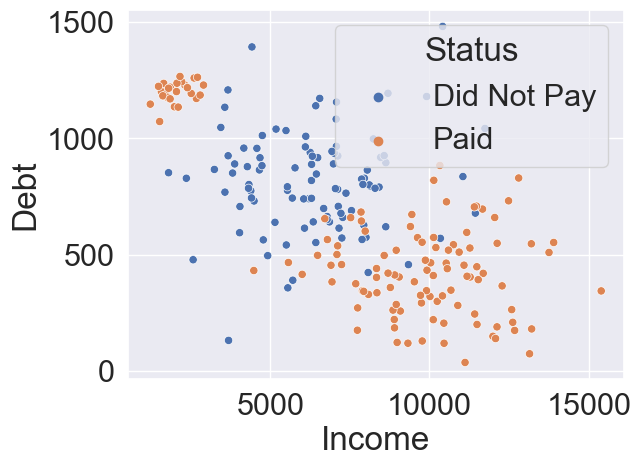

In [225]:
sns.scatterplot(data = df, x='Income', y='Debt', hue='Status')

## Video 2: Nearest Neighbors in sklearn

In [226]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(df[['Income', 'Debt']], df['Status'])

KNeighborsClassifier(n_neighbors=1)

In [227]:
model.predict([[13000, 400]])

array(['Paid'], dtype=object)

In [228]:
model.predict([[2000, 1200]])

array(['Paid'], dtype=object)

In [229]:
def plot_decision_boundary(model, x, y):
    """This function plots the given two class model's decision boundaries over the x and y values provided"""
    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])

    xx, yy = np.meshgrid(x, y)

    Z_string = model.predict(np.c_[xx.ravel(), yy.ravel()])
    categories, Z_int = np.unique(Z_string, return_inverse=True)
    Z_int = Z_int 
    Z_int = Z_int.reshape(xx.shape)
    plt.contourf(xx, yy, Z_int, cmap=sns_cmap)

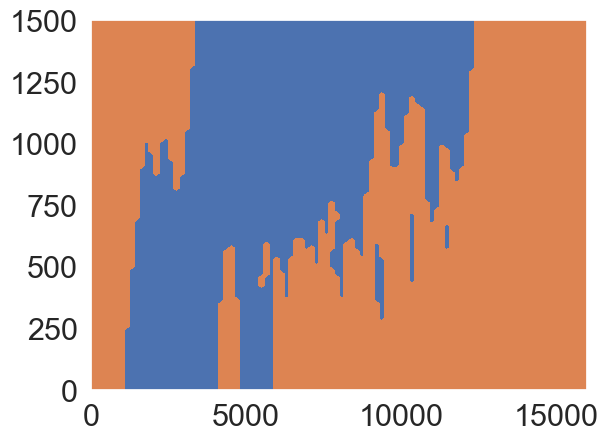

In [230]:
x_range = np.linspace(0, 16000, 100)
y_range = np.linspace(0, 1500, 100)
plot_decision_boundary(model, x_range, y_range)

## k Nearest Neighbors

In [287]:
# feel free to adjust n_neighbors to see how the model changes
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(df[['Income', 'Debt']], df['Status'])

KNeighborsClassifier(n_neighbors=3)

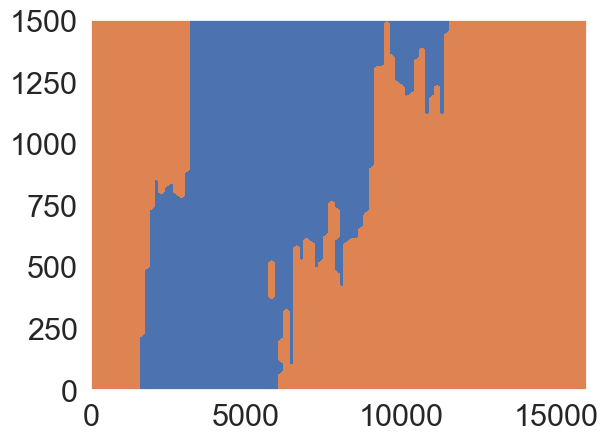

In [288]:
x_range = np.linspace(0, 16000, 100)
y_range = np.linspace(0, 1500, 100)
plot_decision_boundary(model, x_range, y_range)

In [233]:
df["y_hat"] = model.predict(df[["Income", "Debt"]])

In [234]:
df.iloc[0:5]

,Income,Debt,Status,y_hat
0,6552.53,1170.93,Did Not Pay,Paid
1,7247.80,570.94,Did Not Pay,Paid
2,8074.38,422.67,Did Not Pay,Paid
3,5776.60,872.42,Did Not Pay,Paid
4,6297.35,887.56,Did Not Pay,Paid


In [235]:
def get_misclassification_rate_for_k(k):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(df[['Income', 'Debt']], df['Status'])
    return 1 - accuracy_score(model.predict(df[['Income', 'Debt']]), df["Status"])

In [236]:
ks = range(1, len(df))
errors = [get_misclassification_rate_for_k(k) for k in ks]
errors_and_ks = pd.DataFrame({'k': ks, 'Misclassification Rate': errors})

In [237]:
errors_and_ks

,k,Misclassification Rate
0,1,0.000000
1,2,0.062222
2,3,0.084444
3,4,0.075556
4,5,0.093333
...,...,...
219,220,0.444444
220,221,0.444444
221,222,0.444444
222,223,0.444444


In [238]:
errors_and_ks["-k"] = -errors_and_ks["k"]

In [239]:
fig = px.line(errors_and_ks, x = "k", y = "Misclassification Rate")
standardize_figure(fig)
fig.write_image("images/misclassification_rate_vs_k.png",  scale = 2)

In [240]:
fig = px.line(errors_and_ks, x = "-k", y = "Misclassification Rate")
standardize_figure(fig)
fig.show()
fig.write_image("images/misclassification_rate_vs_neg_k.png", scale = 2)

In [241]:
model = KNeighborsClassifier()
parameters_to_try = {'n_neighbors': np.array(range(1, len(df)))}

from sklearn.model_selection import GridSearchCV
model_finder = GridSearchCV(estimator = model, param_grid = parameters_to_try, scoring = "accuracy", cv = 5)

In [242]:
model_finder.fit(df[['Income', 'Debt']], df["Status"])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224])},
             scoring='accuracy')

In [243]:
model_finder.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [244]:
model_finder.cv_results_['mean_test_score']

array([0.74666667, 0.75111111, 0.77333333, 0.76888889, 0.76444444,
       0.76888889, 0.76444444, 0.76      , 0.76      , 0.76      ,
       0.76      , 0.75555556, 0.76      , 0.76      , 0.76      ,
       0.75555556, 0.76888889, 0.74666667, 0.75555556, 0.74666667,
       0.73777778, 0.74666667, 0.75111111, 0.74666667, 0.75111111,
       0.74222222, 0.74222222, 0.74222222, 0.74222222, 0.73777778,
       0.72888889, 0.73333333, 0.72444444, 0.72      , 0.71555556,
       0.71555556, 0.72      , 0.72      , 0.72      , 0.71555556,
       0.71555556, 0.71555556, 0.71555556, 0.72      , 0.72      ,
       0.72444444, 0.72      , 0.72444444, 0.72444444, 0.72444444,
       0.72444444, 0.73777778, 0.73777778, 0.73777778, 0.73777778,
       0.73333333, 0.73777778, 0.72888889, 0.73777778, 0.73777778,
       0.73333333, 0.72888889, 0.73333333, 0.73333333, 0.73333333,
       0.72888889, 0.73333333, 0.73333333, 0.73333333, 0.73333333,
       0.73333333, 0.73333333, 0.73333333, 0.73333333, 0.73333

In [245]:
len(df)

225

In [246]:
gridsearch_output = pd.DataFrame({'CV accuracy': model_finder.cv_results_['mean_test_score'], 'k': np.array(range(1, len(df)))})

In [247]:
fig = px.line(gridsearch_output, x = "k", y = "CV accuracy")
standardize_figure(fig)
fig.show()
fig.write_image("images/cv_accuracy_vs_k.png")

In [248]:
gridsearch_output["-k"] = -gridsearch_output["k"]
gridsearch_output["CV Error"] = 1 - gridsearch_output["CV accuracy"]

In [249]:
fig = px.line(gridsearch_output, x = "-k", y = "CV Error")
standardize_figure(fig)
fig.show()
fig.write_image("images/cv_error_vs_minus_k.png")

In [250]:
gridsearch_output

,CV accuracy,k,-k,CV Error
0,0.746667,1,-1,0.253333
1,0.751111,2,-2,0.248889
2,0.773333,3,-3,0.226667
3,0.768889,4,-4,0.231111
4,0.764444,5,-5,0.235556
...,...,...,...,...
219,NaN,220,-220,NaN
220,NaN,221,-221,NaN
221,NaN,222,-222,NaN
222,NaN,223,-223,NaN


In [251]:
both_training_and_CV_errors = pd.merge(errors_and_ks.rename(columns = {"Misclassification Rate": "Training Error"}),
         gridsearch_output,
         left_on = "-k",
         right_on = "-k",
         how = "inner")
both_training_and_CV_errors

,k_x,Training Error,-k,CV accuracy,k_y,CV Error
0,1,0.000000,-1,0.746667,1,0.253333
1,2,0.062222,-2,0.751111,2,0.248889
2,3,0.084444,-3,0.773333,3,0.226667
3,4,0.075556,-4,0.768889,4,0.231111
4,5,0.093333,-5,0.764444,5,0.235556
...,...,...,...,...,...,...
219,220,0.444444,-220,NaN,220,NaN
220,221,0.444444,-221,NaN,221,NaN
221,222,0.444444,-222,NaN,222,NaN
222,223,0.444444,-223,NaN,223,NaN


In [252]:
both_training_and_CV_errors["CV Error"]

0      0.253333
1      0.248889
2      0.226667
3      0.231111
4      0.235556
         ...   
219         NaN
220         NaN
221         NaN
222         NaN
223         NaN
Name: CV Error, Length: 224, dtype: float64

In [253]:
fig = px.line(both_training_and_CV_errors, x = "-k", y = ["Training Error", "CV Error"])
standardize_figure(fig)
fig.update_layout(legend_title= "", legend=dict( x=0.05, y=0.05, bordercolor="Black", borderwidth=2))
fig.show()
fig.write_image("images/Training_and_CV_error_vs_minus_k.png")

In [254]:
fig = px.line(both_training_and_CV_errors.iloc[0:40], x = "-k", y = ["Training Error", "CV Error"])
standardize_figure(fig)
fig.update_layout(legend_title= "", legend=dict(x=0.05, y=0.05, bordercolor="Black", borderwidth=2))
fig.show()
fig.write_image("images/Training_and_CV_error_vs_minus_k_small_k_only.png")

### predict_proba

In [255]:
#np.random.seed(201)

In [256]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(df[['Income', 'Debt']], df['Status'])

KNeighborsClassifier(n_neighbors=10)

In [257]:
ten_random_rows = df[["Income", "Debt"]].iloc[[217, 70, 146, 211, 71, 23, 179, 163, 144, 157]]
ten_random_rows

,Income,Debt
217,2052.38,1200.14
70,5536.69,791.12
146,8349.86,335.78
211,2216.65,1242.31
71,2575.43,477.58
23,7275.85,659.38
179,7093.72,500.13
163,11278.11,403.40
144,6711.90,654.25
157,11084.64,454.15


In [258]:
pd.DataFrame(model.predict(ten_random_rows[["Income", "Debt"]]), columns = ["prediction"])

,prediction
0,Paid
1,Did Not Pay
2,Paid
3,Paid
4,Paid
5,Did Not Pay
6,Did Not Pay
7,Paid
8,Did Not Pay
9,Paid


In [259]:
model.predict_proba(ten_random_rows[["Income", "Debt"]])

array([[0. , 1. ],
       [0.9, 0.1],
       [0.3, 0.7],
       [0. , 1. ],
       [0.3, 0.7],
       [0.7, 0.3],
       [0.5, 0.5],
       [0. , 1. ],
       [0.6, 0.4],
       [0.1, 0.9]])

In [260]:
pd.DataFrame(["Paid" if x else "Did Not Pay" for x in model.predict_proba(ten_random_rows[["Income", "Debt"]])[:, 1] >= 0.9], columns = ["prediction"])

,prediction
0,Paid
1,Did Not Pay
2,Did Not Pay
3,Paid
4,Did Not Pay
5,Did Not Pay
6,Did Not Pay
7,Paid
8,Did Not Pay
9,Paid


### Precision Recall Curves

In [261]:
def show_confusion_matrix_and_print_accuracy_and_recall(reality, predictions):
    cm = confusion_matrix(reality, predictions)
    sns.heatmap(cm, annot=True, fmt = "d", cmap = "Blues", annot_kws={"size": 20}, cbar = False)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    sns.set(font_scale = 2)
    print(f"Precision: {precision_score(reality, predictions)}")
    print(f"Recall: {recall_score(reality, predictions)}")    

In [262]:
def predict_with_threshold(probabilities, T):
    p1 = probabilities[:, 1]
    return 1 * (p1 > T)

In [263]:
model = KNeighborsClassifier(n_neighbors = 30)
model.fit(df[['Income', 'Debt']], df['Status'])

KNeighborsClassifier(n_neighbors=30)

In [264]:
yhat_probabilities = model.predict_proba(df[['Income', 'Debt']])

In [265]:
df["Status_number"] = (df["Status"] == "Paid") * 1

Precision: 0.7011494252873564
Recall: 0.976


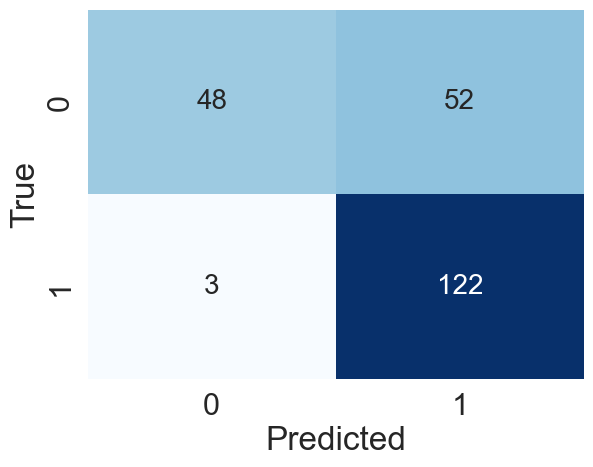

In [266]:
show_confusion_matrix_and_print_accuracy_and_recall(df["Status_number"], predict_with_threshold(yhat_probabilities, 0.2))

Precision: 0.8560606060606061
Recall: 0.904


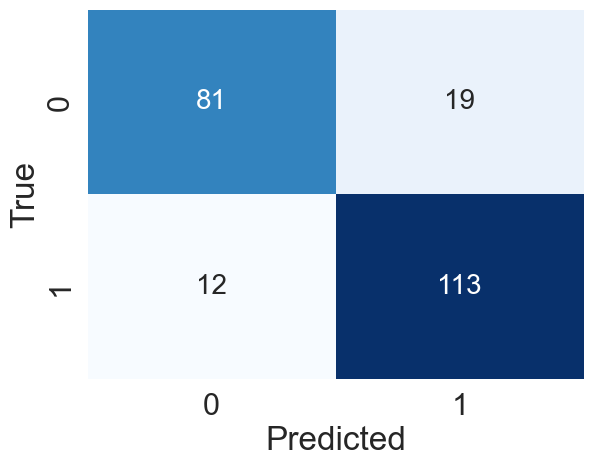

In [267]:
show_confusion_matrix_and_print_accuracy_and_recall(df["Status_number"], predict_with_threshold(yhat_probabilities, 0.4))

Precision: 0.908256880733945
Recall: 0.792


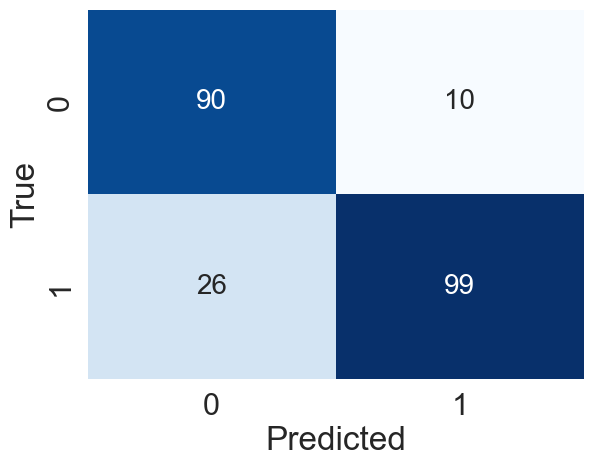

In [268]:
show_confusion_matrix_and_print_accuracy_and_recall(df["Status_number"], predict_with_threshold(yhat_probabilities, 0.6))

Precision: 0.9042553191489362
Recall: 0.68


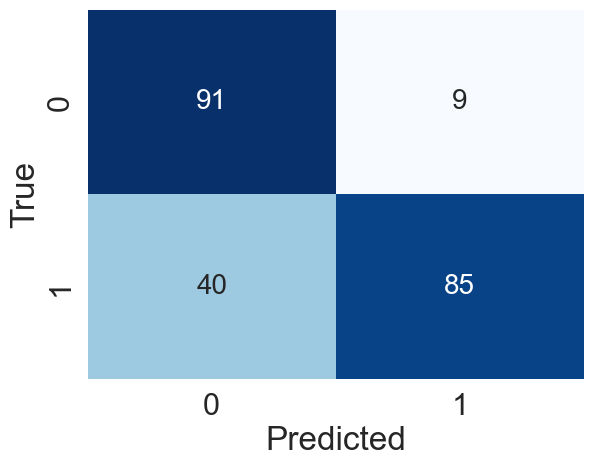

In [269]:
show_confusion_matrix_and_print_accuracy_and_recall(df["Status_number"], predict_with_threshold(yhat_probabilities, 0.8))

In [270]:
#model = KNeighborsClassifier(n_neighbors = 30)
#model.fit(df[['Income', 'Debt']], df['Status'])
#yhat_probabilities = model.predict_proba(df[['Income', 'Debt']])
#df["Status_number"] = (df["Status"] == "Paid") * 1
precision, recall, thresholds = precision_recall_curve(df["Status"], yhat_probabilities[:, 1], pos_label = "Paid")

precision_recall_data = pd.DataFrame({"precision" : precision[:-1], "recall": recall[:-1], "T": thresholds})
px.line(precision_recall_data, y = "precision", x = "recall", hover_name = "T", markers = True)
#plt.plot(recall, precision, '*')
#plt.xlabel("recall")
#plt.ylabel("precision")
#plt.text(recall[467], precision[467], f"T = {thresholds[467]:.2f}")
#plt.text(recall[400], precision[400], f"T = {thresholds[400]:.2f}")
#plt.text(recall[540], precision[540], f"T = {thresholds[540]:.2f}")
#plt.ylim(-0.03, 1.05)
#plt.savefig("images/precision_vs_recall_lm_better.png", dpi = 300, bbox_inches = "tight")
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [271]:
class RandomGuesser():
    def predict(self, x):
        return np.random.random(len(x))
        
rg = RandomGuesser()  
rg.predict(df[["Income", "Debt"]])

array([0.73823867, 0.88173988, 0.61832141, 0.26290741, 0.74806671,
       0.3048313 , 0.01878828, 0.44731791, 0.31324431, 0.9836448 ,
       0.29718265, 0.30789529, 0.07908413, 0.34469016, 0.00666564,
       0.98680427, 0.73598862, 0.34985495, 0.73397749, 0.39317295,
       0.39617861, 0.04623849, 0.55624411, 0.16055879, 0.57578345,
       0.89740487, 0.38245999, 0.41403897, 0.97719742, 0.62881635,
       0.75569353, 0.00531901, 0.56939286, 0.06102222, 0.7962305 ,
       0.96735279, 0.28773224, 0.58630054, 0.36323593, 0.91120255,
       0.30079646, 0.93032615, 0.39423654, 0.66910623, 0.72950959,
       0.54246255, 0.12895208, 0.73774707, 0.60322869, 0.02744696,
       0.26915207, 0.69036267, 0.94329742, 0.45455953, 0.17991937,
       0.61391324, 0.37304487, 0.22349347, 0.19025755, 0.78488319,
       0.18505089, 0.44603364, 0.09994961, 0.81695404, 0.57957916,
       0.65087797, 0.63114764, 0.03026025, 0.69405162, 0.30313646,
       0.51118153, 0.64980397, 0.69891702, 0.70379029, 0.96494

In [272]:
precision, recall, thresholds = precision_recall_curve(df["Status"], rg.predict(df[["Income", "Debt"]]), pos_label = "Paid")

precision_recall_data = pd.DataFrame({"precision" : precision[:-1], "recall": recall[:-1], "T": thresholds})
px.line(precision_recall_data, y = "precision", x = "recall", hover_name = "T", markers = True)

## Nearest Neighbors for Regression

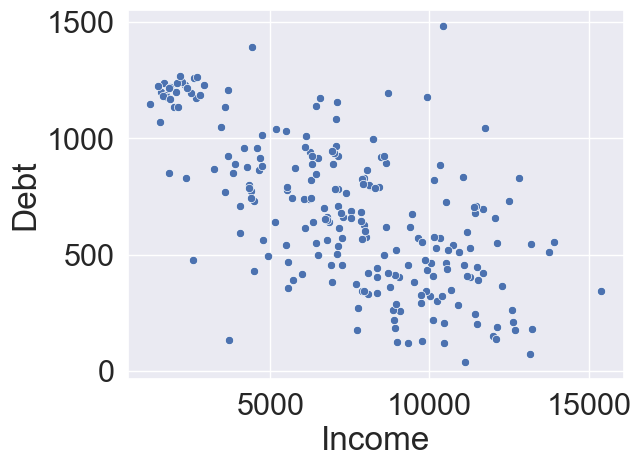

In [273]:
sns.scatterplot(data=df, x="Income", y="Debt")
fig = plt.gcf()
fig.savefig("images/debt_vs_income.png", dpi=300, bbox_inches = "tight")

In [274]:
rmodel = KNeighborsRegressor(n_neighbors = 1)
rmodel.fit(df[["Income"]], df["Debt"])
rmodel.predict([[15800]])

array([343.56])

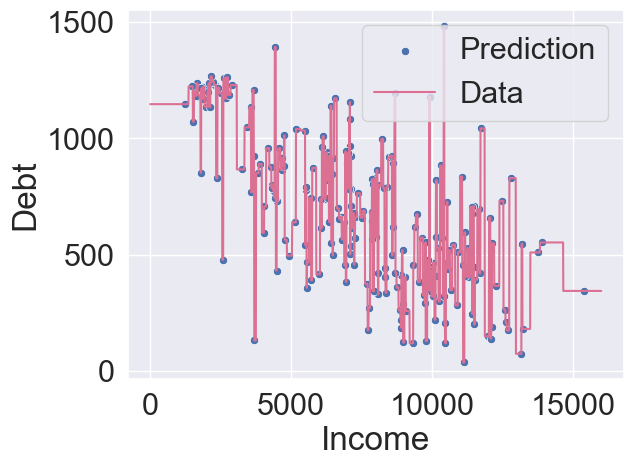

In [275]:
income_values = np.linspace(0, 16000, 2000)
sns.scatterplot(data=df, x="Income", y="Debt")
sns.lineplot(x = income_values, y = rmodel.predict(income_values.reshape(-1, 1)), color="palevioletred")
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig("images/debt_vs_income_prediction_k1.png", dpi=300, bbox_inches = "tight")

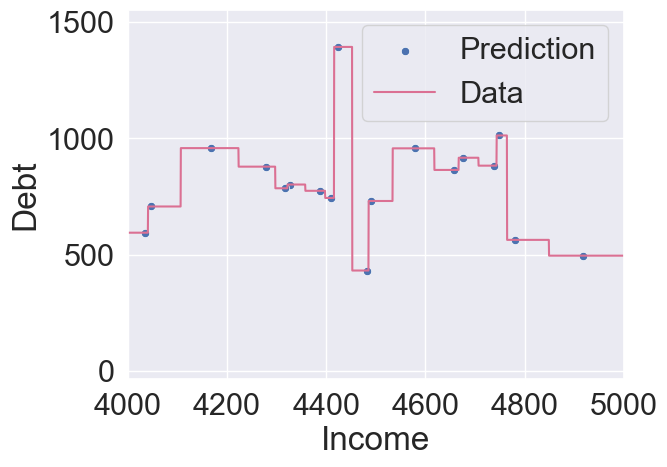

In [276]:
income_values = np.linspace(4000, 5000, 2000)
sns.scatterplot(data=df, x="Income", y="Debt")
sns.lineplot(x = income_values, y = rmodel.predict(income_values.reshape(-1, 1)), color="palevioletred")
plt.gca().set_xlim(4000, 5000)
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig("images/debt_vs_income_prediction_k1_zoomed.png", dpi=300, bbox_inches = "tight")

In [277]:
rmodel50 = KNeighborsRegressor(n_neighbors = 50)
rmodel50.fit(df[["Income"]], df["Debt"])

KNeighborsRegressor(n_neighbors=50)

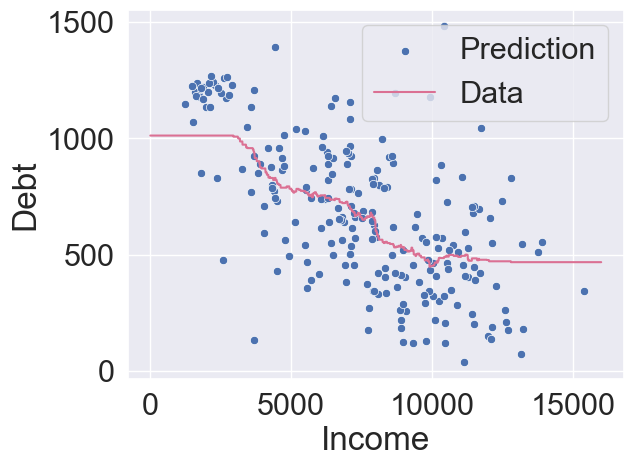

In [278]:
income_values = np.linspace(0, 16000, 2000)
sns.scatterplot(data=df, x="Income", y="Debt")
sns.lineplot(x = income_values, y = rmodel50.predict(income_values.reshape(-1, 1)), color="palevioletred")
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig("images/debt_vs_income_prediction_k50.png", dpi=300, bbox_inches = "tight")

In [279]:
rmodel220 = KNeighborsRegressor(n_neighbors = 220)
rmodel220.fit(df[["Income"]], df["Debt"])

KNeighborsRegressor(n_neighbors=220)

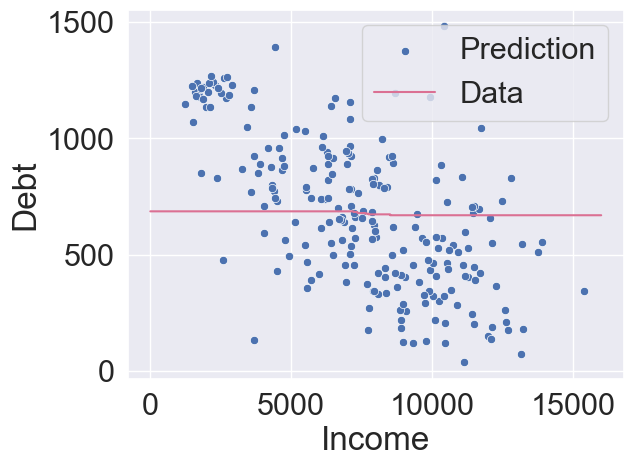

In [280]:
income_values = np.linspace(0, 16000, 2000)
sns.scatterplot(data=df, x="Income", y="Debt")
sns.lineplot(x = income_values, y = rmodel220.predict(income_values.reshape(-1, 1)), color="palevioletred")
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig("images/debt_vs_income_prediction_k220.png", dpi=300, bbox_inches = "tight")